,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

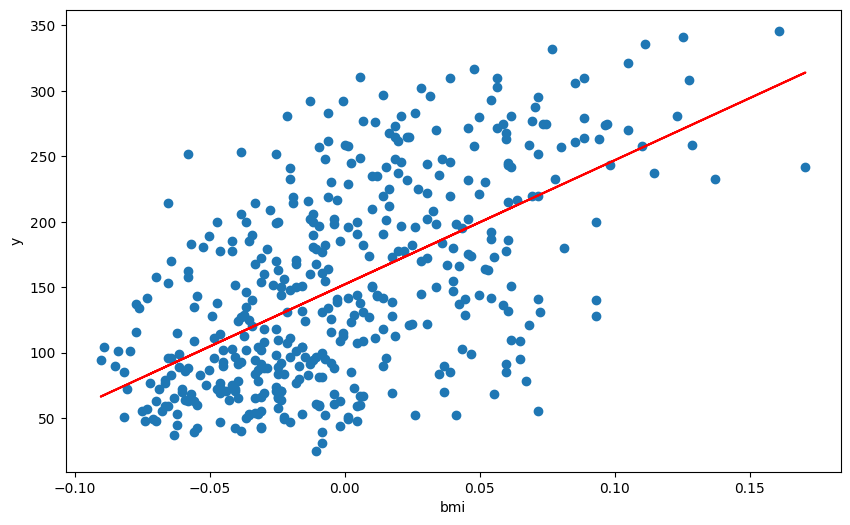

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x, y = datasets.load_diabetes(as_frame=True, return_X_y=True)
display(x)
display(y)

bmi = x[['bmi']]
simple_lr = LinearRegression()
simple_lr.fit(bmi, y)

predicted_y = simple_lr.predict(bmi)

plt.figure(figsize=(10, 6))
plt.scatter(bmi, y)
plt.plot(bmi, predicted_y, c = 'r')
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

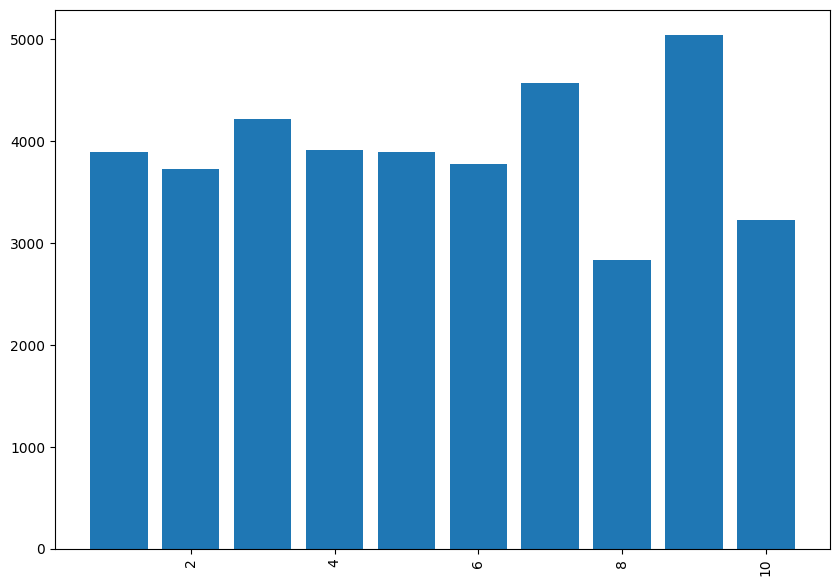

-3906.91899010684


In [49]:
from sklearn.model_selection import cross_val_score

mse = cross_val_score(simple_lr,
                      bmi,
                      y,
                      scoring='neg_mean_squared_error',
                      cv=10)

mse_fig = plt.figure(figsize=(10, 7))
ax = mse_fig.add_subplot(111)
ax.bar(range(1, len(mse) + 1), abs(mse))
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

print(mse.mean())

## Как работает кросс-валидация:

* Разделение данных: Набор данных делится на несколько частей (фолдов).
* Поочерёдное обучение: Модель обучается на всех фолдах, кроме одного, который используется для проверки.
* Оценка качества: Качество модели оценивается на оставшемся фолде.
* Повторение: Этот процесс повторяется для каждого фолда, модель обучается на всех фолдах по очереди.

Mean Squared Error (MSE) — это широко используемая метрика оценки качества моделей регрессии. Она вычисляет средний квадрат отклонения предсказанных значений от фактических значений

## Базовый метод:

In [11]:
from sklearn.linear_model import Ridge, Lasso
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

x, y = datasets.load_diabetes(as_frame=True, return_X_y=True)
bmi = x[['bmi']]

def render_model(model_lr, X, Y, labelX, labelY, cv_val):
    predicted_y = model_lr.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y)
    plt.plot(X, predicted_y, c = 'r')
    plt.ylabel(labelY)
    plt.xlabel(labelX)
    plt.show()

    mse = cross_val_score(model_lr,
                      X,
                      Y,
                      scoring='neg_mean_squared_error',
                      cv=cv_val)

    mse_fig = plt.figure(figsize=(10, 7))
    ax = mse_fig.add_subplot(111)
    ax.bar(range(1, len(mse) + 1), abs(mse))
    ax.tick_params(axis='x', labelrotation = 90)
    plt.show()

    coefficients = model_lr.coef_
    print(coefficients)
    
    print(mse.mean())

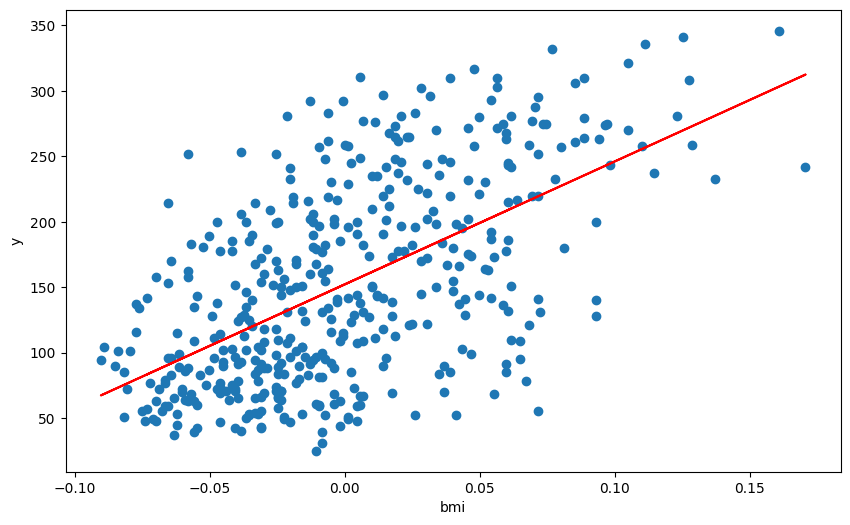

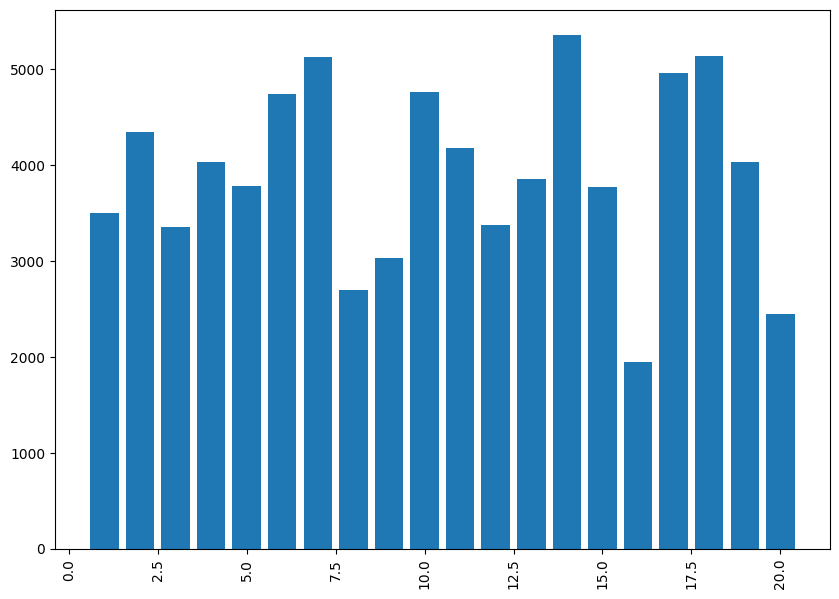

-3918.8140197043053


In [12]:
ridge_lr = Ridge(alpha=0.01) 
ridge_lr.fit(bmi, y)
render_model(ridge_lr, bmi, y, "bmi", "y", 20)

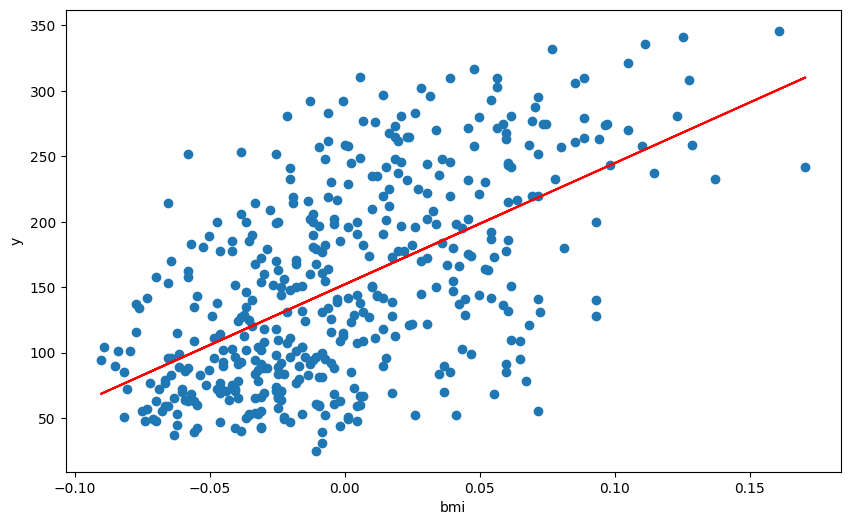

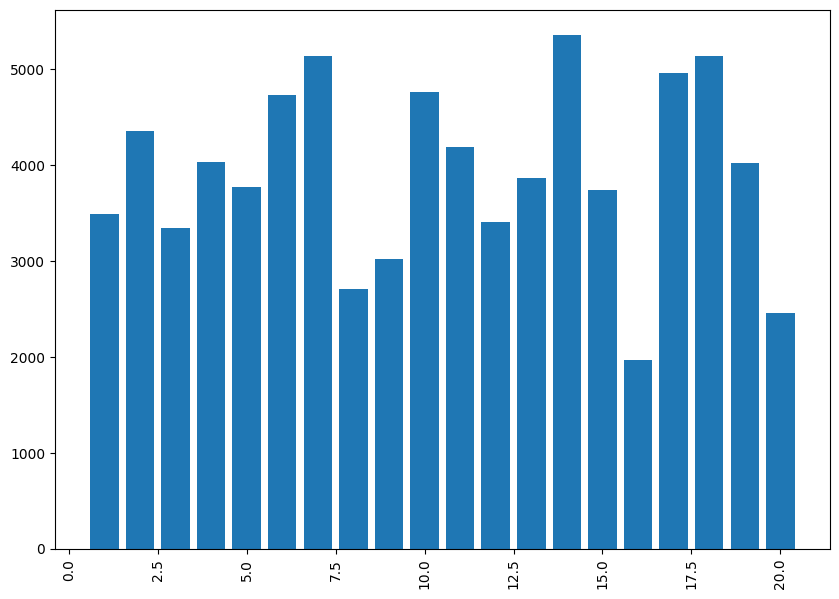

-3920.131996230807


In [13]:
lasso_lr = Lasso(alpha=0.05)
lasso_lr.fit(bmi, y)
render_model(lasso_lr, bmi, y, "bmi", "y", 20)

## ## * * * *c  * * * * * * * * * * __________

In [ ]:
__ElasticNet комбинирует Lasso и Ridge.__
__ElasticNet - уже имеет гиперпараметр, который контролирует баланс между L1-регуляризацией (Lasso) и L2-регуляризацией (Ridge) в модели.__

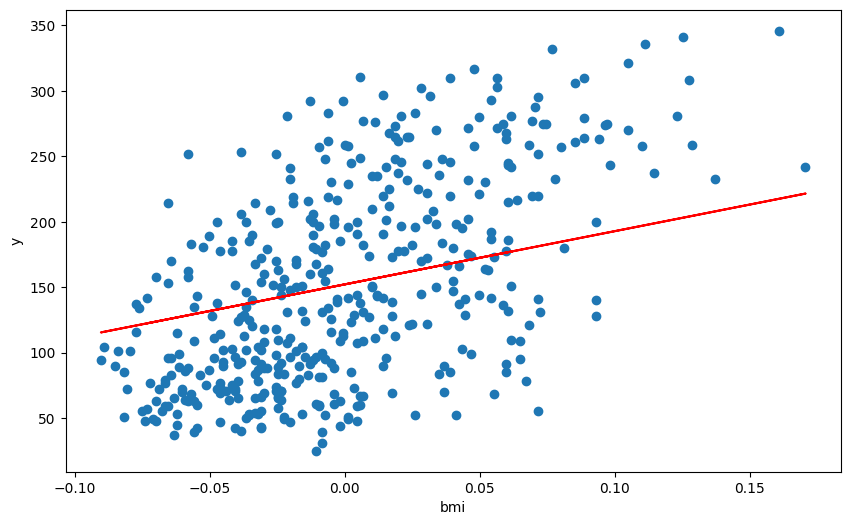

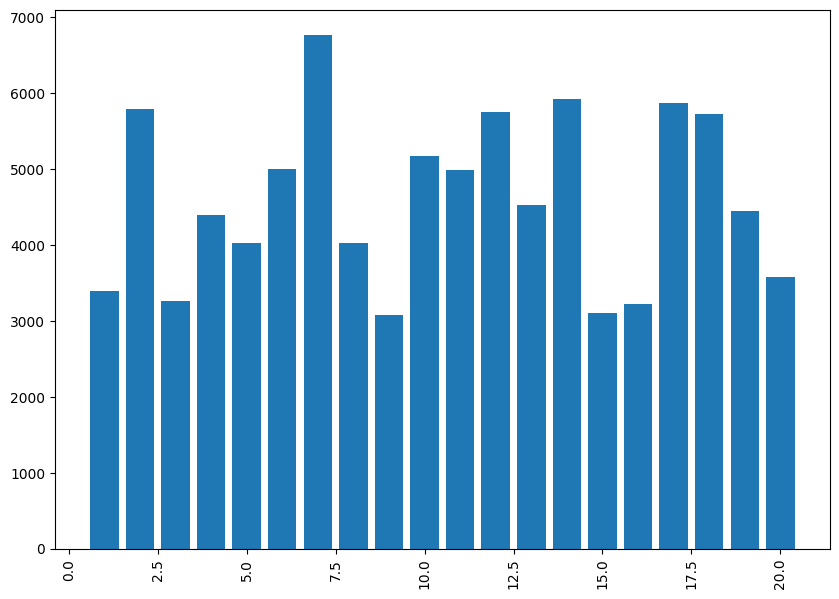

[406.85350833]
-4596.350867179963


In [12]:
from sklearn.linear_model import ElasticNet

elastic_lr = ElasticNet(alpha=0.01, l1_ratio = 0.7)
elastic_lr.fit(bmi, y)
render_model(elastic_lr, bmi, y, "bmi", "y", 20)

#l1_ratio - это коэффицент "a" в ax + b

# Динамическое обучение

C:\Users\LKDat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


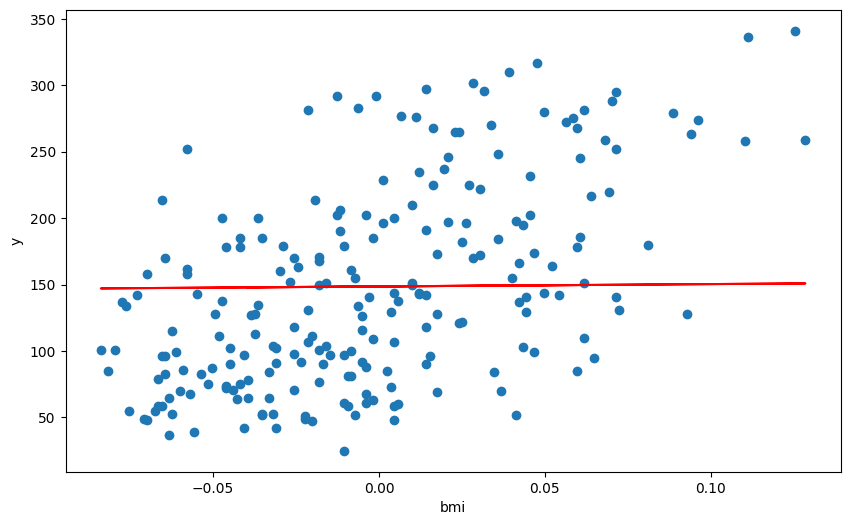

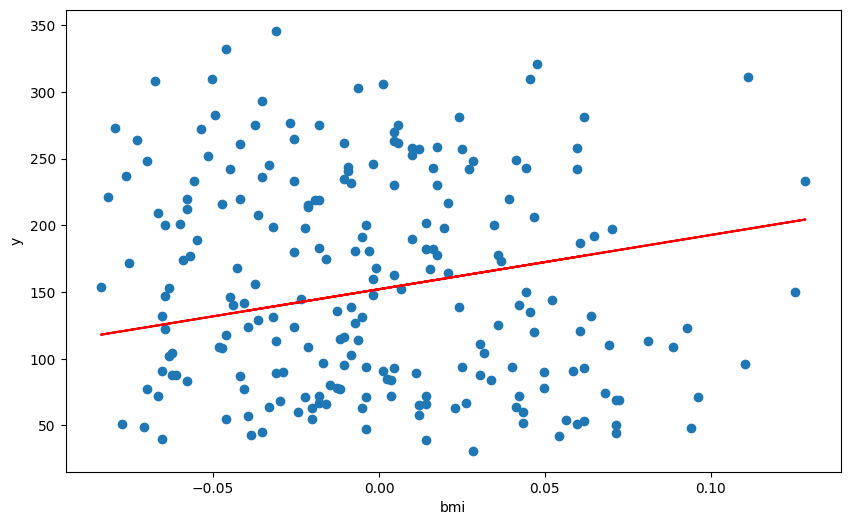

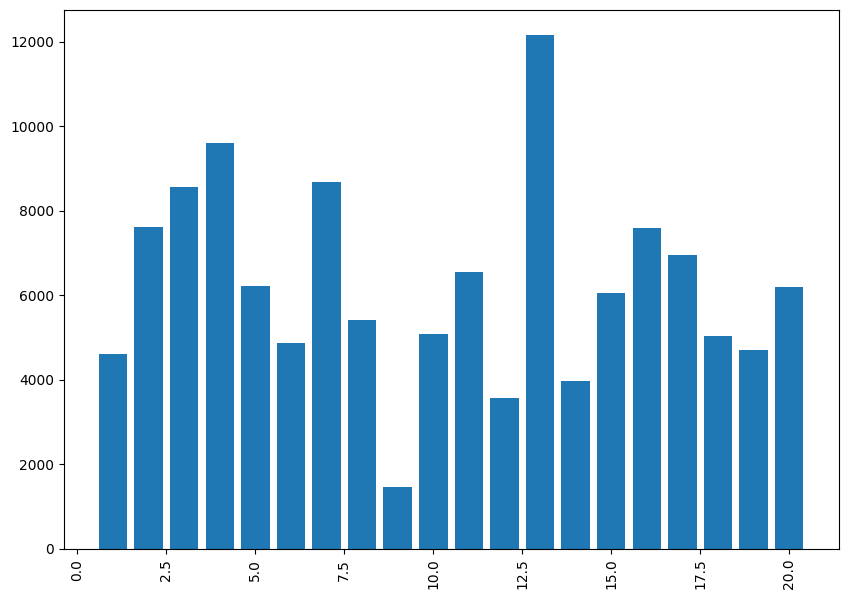

[406.85350833]
-6240.53961375494


In [78]:
from sklearn.linear_model import Ridge, Lasso
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

def render_model_2(model_lr, X, Y, labelX, labelY, cv_val):
    predicted_y = model_lr.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y)
    plt.plot(X, predicted_y, c = 'r')
    plt.ylabel(labelY)
    plt.xlabel(labelX)
    plt.show()

x, y = datasets.load_diabetes(as_frame=True, return_X_y=True)
bmi = x[["bmi"]]

half_ind = int(len(x)/2)
x1 = x[0 : half_ind]
y1 = y[0 : half_ind]
bmi1 = x1[["bmi"]]
#display(x1)
#display(y1)

x2 = x[half_ind : len(x)]
y2 = y[half_ind : len(x)]
bmi2 = x1[["bmi"]]
#display(x2)
#display(y2)

from sklearn.linear_model import SGDRegressor  # Модель с `partial_fit`

class DynamicLinearRegression:
    def __init__(self):
        self.model = SGDRegressor(max_iter=1) 

    def fit(self, x, y, epochs=10):
        # Обучение модели
        x = x.iloc[:, 0]
        y = list(y)
        for epoch in range(epochs):
            for i in range(len(x)):
                # Получение одного образца
                x_t = x[i].reshape(1, -1)  # Преобразуем в матрицу (1, num_features)
                y_true = y[i]

                # Обучение модели на текущей строке
                self.model.partial_fit(x_t, [y_true])

    def predict(self, X):
        # Вычисление предсказаний
        y_pred = self.model.predict(X)
        return y_pred

    def model(self):
        return self.model

model = DynamicLinearRegression()
model.fit(bmi1, y1, epochs=30)
render_model_2(model, bmi1, y1, "bmi", "y", 20)

elastic_lr = ElasticNet(alpha=0.01, l1_ratio = 0.7)
elastic_lr.fit(bmi, y)
render_model(elastic_lr, bmi2, y2, "bmi", "y", 20)